# Customer churn in telecommunications company: case study

## Abstract

The following report and research proposal has the aim to analyse the data sample [available on IBM Watson website] [REFENCE] on the churn problem in a given telecommunication company and bring the insights from the data analysis. This notebook will guide the reader throught important analytical processes in order to answer the business questions in regards to churn and highlights the findings. 

### The goal and scope of the analysis

Customer churn is an important issue for any business, since it directly impacts the market share of a company and its profitability. Predicting churn and understanding how to work with clients who are about to churn is very beneficial. For this purpose, we will bring the insights from the data that would help define the patterns shared by churning customers and help us understand better what might be a reason for the churn. 

Based on the data we have, we'll focus primarily on giving insights about the following questions: 
1. When do clients churn? 
2. Who are these people who are churning and how different they are from non-churners? 

In regards to the second question above we'll split the client base into various segments and analyse a few extreme profiles to find out any similarities between churning clients. Also, we're interested to characterize the customers who are happy to stay with the company for very long time and are not prone to churn. Hence, we'll analyse in particular, the following segments:
- Clients who are not churning and have the longest tenure 
- Clients who stayed long with company and eventually churned
- Clients who churned quickly 




## Data set description

We have the client data found on IBM Watson from telecommunication companies [LINK]. The dataset has 7043 rows, each belonging to a single client, and 21 columns describing demographic characteristics of the customers, services used, payment patterns and their churn status. 



## 1. Research and Analysis 

### 1.1. Data loading and preprocessing 

Before digging into the analysis, we need to load the data and see what it consists of to make sure that the formatting of the data is suitable for our data analysis. 

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="ticks", context='talk', font='monospace')
# TODO: find how to change font size to slightly smaller
%matplotlib inline

df=pd.read_csv("../Telco_churn_data.csv")
df.head(n=10)



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


As we see some of the columns have values "1" / "0" instead of "Yes" / "No" or any other discriptive values. We'll unify the formatting of the columns to make them more understandable to use in the plots later. After that, we will answer reseach questions. 

In [183]:
df.SeniorCitizen.replace([1, 0], ['Senior', 'Non-senior'], inplace=True)
df.Dependents.replace(['Yes', 'No'], ['Dependents', 'No dependents'], inplace=True)
df.Partner.replace(['Yes', 'No'], ['Partner', 'No partner'], inplace=True)

## Research question 1: When do clients churn? 

To understand the distribution of time when clients used to churn, we'll create a new dataframe of clients who churned and build a histogram of their tenure. 

In [184]:
churning_clients = pd.DataFrame(df[df['Churn'] == 'Yes'])

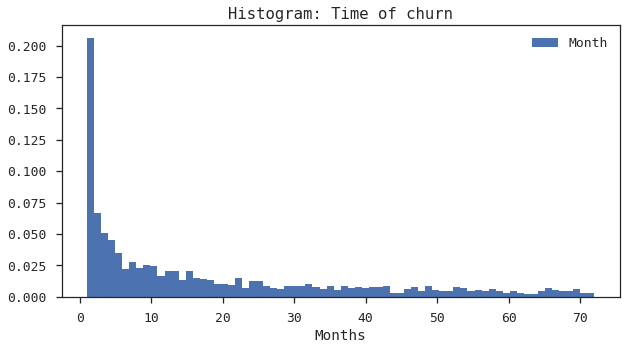

In [185]:
plt.figure(figsize=(10, 5))

plt.hist(churning_clients['tenure'], normed=True, bins = 72, label='Month') 
plt.legend()
plt.title('Histogram: Time of churn')
plt.xlabel('Months') ;

From what we can see on the histogram, the clients tend to churn in the beginning of their journey with the company. It can be an indicator that the expectations of clients regarding the service were not met. The churn rates are the highest withing the first 10 months and then the gradually flat. Let's see how many clients churned during each of the first 5 months.

In [186]:
tenure = pd.DataFrame(churning_clients['tenure'].value_counts())
tenure.sort_index(inplace=True)
tenure.columns = ['Number of clients']
tenure.head(n=5)

,Number of clients
1,380
2,123
3,94
4,83
5,64


The first month is when the vast majority of churning clients decide to quit the company. 

To get the full pucture of client churn over time, we'll use intervals of 12 months and build a barplot observing how clients churn year by year.

,Number of clients
1,1037
2,256
3,157
4,130
5,105


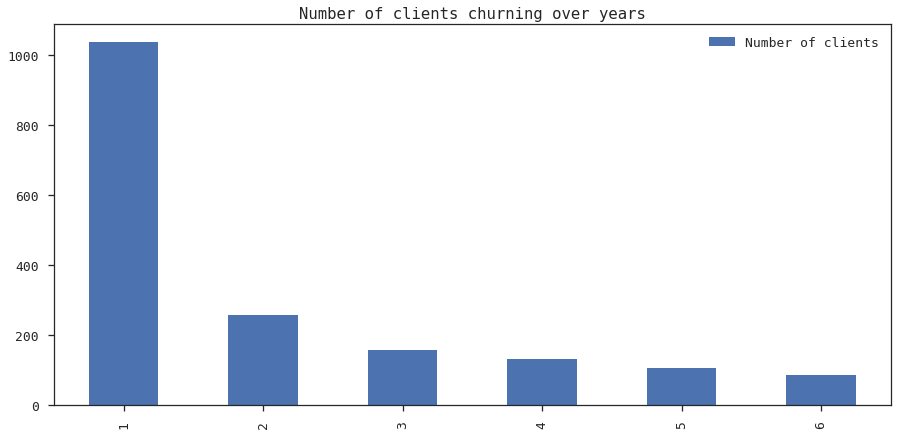

In [187]:
grouped_tenure = pd.DataFrame([tenure.iloc[0:12].sum(), 
                               tenure.iloc[13:24].sum(), 
                               tenure.iloc[25:36].sum(), 
                               tenure.iloc[37:48].sum(),
                               tenure.iloc[49:60].sum(),
                               tenure.iloc[61:72].sum()])

new_index = ['1', '2', '3', '4', '5', '6']
# Code on binning: https://stackoverflow.com/questions/14451185/better-binning-in-pandas
# value_counts(normalize=True)
grouped_tenure.index = new_index 
grouped_tenure.plot.bar(figsize=(15, 7), title='Number of clients churning over years', label='Year');
grouped_tenure.head()

The churn rate over time falls dramatically: from a thousand of clients churning in their first year to less than a hundred in their 6th year. 

### Tenure of current clients

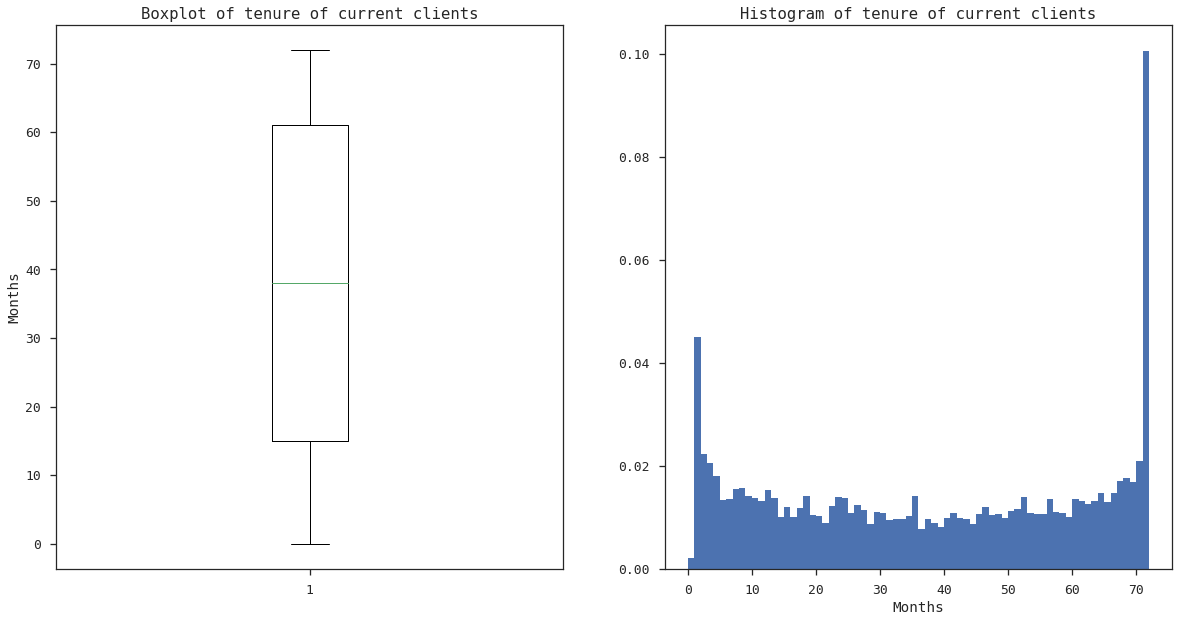

In [188]:
non_churning_clients = pd.DataFrame(df[df['Churn'] == 'No'])
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.boxplot(non_churning_clients['tenure'])
plt.title('Boxplot of tenure of current clients')
plt.ylabel('Months')

plt.subplot(1, 2, 2)
plt.hist(non_churning_clients['tenure'], bins=72, normed=True)
plt.title('Histogram of tenure of current clients')
plt.xlabel("Months")

plt.show() 

The tenure of the current costumers is spread almost evenly across the time period with two peaks in the beginning and at the end. We can infer that the company has evenly retained clients over time. The peak at the ends of the graph can be explained either by the fact that the first clients were very loyal and didn't churn or probably that many more clients joined the company at its start. 

Let's now look into factors that could help predict if a client is more likely to churn or to stay with the company. We'll compare demographic characteristics and usage patters of churners and non-churners in general, and then analyse  specific groups of clients, taking into account their churn status.

## Research question 2: Who are the churners and how different they are from non-churners?

### Difference among churners and non-churners: general trends

Let's see if churners vs non-churners are different in terms of their demographics and services they use.

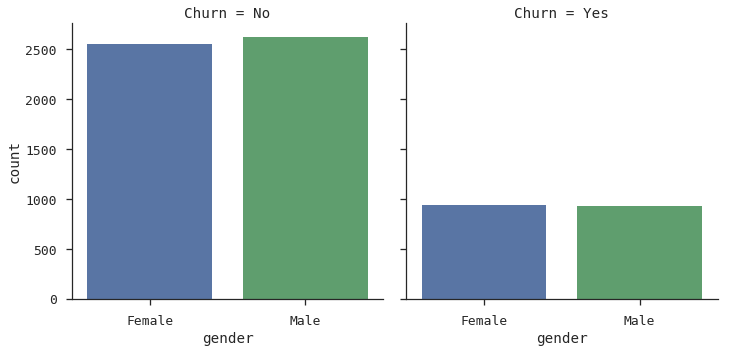

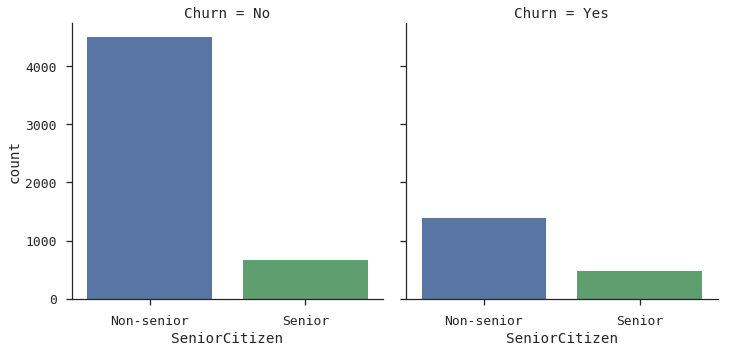

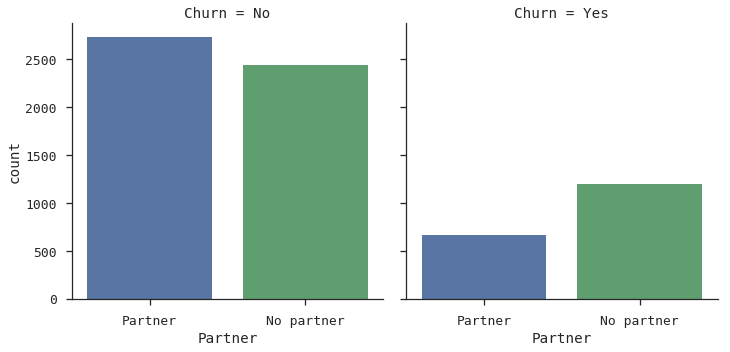

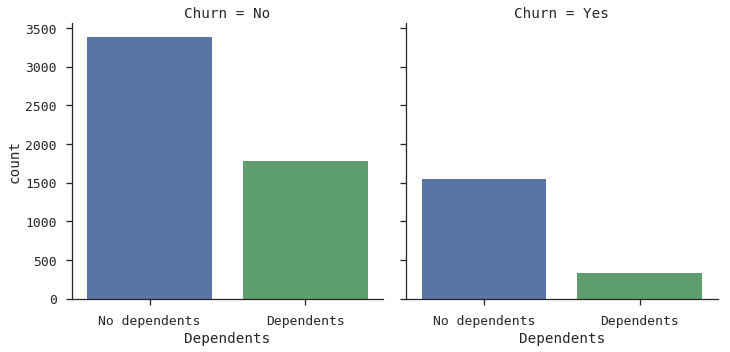

In [189]:
columns = df.columns[1:5]
for column in columns: 
    sb.factorplot(data=df, x=column, col='Churn', kind='count', size=5, aspect=1)

From the demographical data analysis we can see that clients without partners tend to churn more that those with the partners. Also, as can be see from the plot that takes seniority of clients as a factor (2), the persentage of churn among senior clients is much more than that of non-senior clients. On the opposite side, customers with Dependents tend to churn much less than those without ones. 

Let's perform the analysis of services usage for churning and non-churning clients. We will not run the analysis for all the specified columns in the Jupyter Notebook, but here you can find the code that is be used to see all the plots: 

In [190]:
# columns = df.columns[6:15]
# for column in columns: 
#    sb.factorplot(data=df, x=column, col='Churn', kind='count', size=5, aspect=1)

Most interesting plots for types of services the clients use:

In [191]:
#TODO: present graphs for'InternetService', 'OnlineBackup', 'TechSupport', 'DeviceProtection'

Now we'd like to see how the clients pay for the services and how much depending on their churn status: 

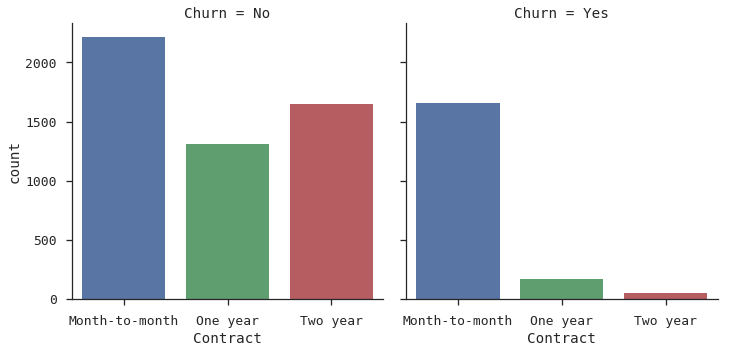

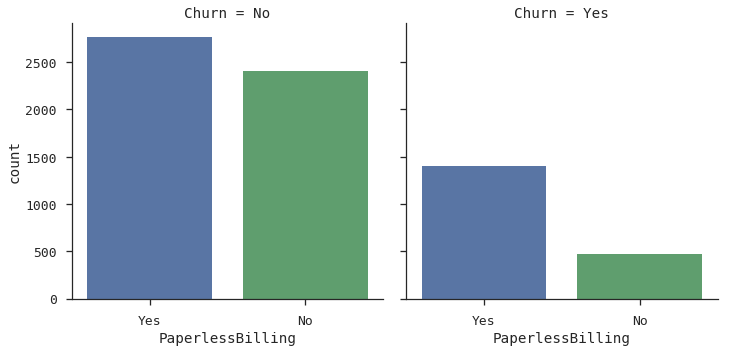

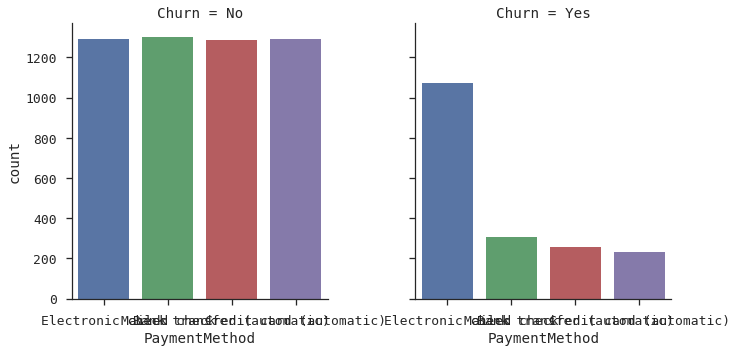

In [192]:
columns = df.columns[15:18]
for column in columns: 
    sb.factorplot(data=df, x=column, col='Churn', kind='count', size=5, aspect=1)

# ? how to present better the last plot about PaymentMethod? Legend?

[TODO] Describe: Month-to-month - easier to churn. Electronic check and paperless bill -  mobile people, who are tech savy

In [193]:
# df.TotalCharges.describe() - object type
# df.TotalCharges.astype(float) - gives error
# ? how to find str values and convert them to float? 

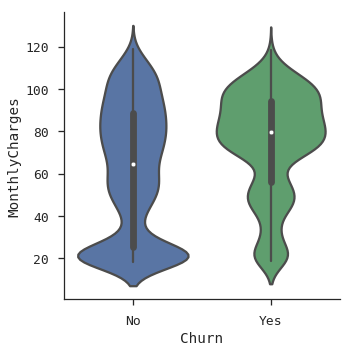

In [194]:
sb.factorplot(data=df, x='Churn', y='MonthlyCharges', kind='violin', size=5, aspect=1);
# sb.factorplot(data=df, x='Churn', y='TotalCharges', kind='violin', size=5, aspect=1);

##  Difference among churners and non-churners: extreme segments

Now we'll compare 3 extreme segments: 
- Clients who are not churning and have the longest tenure (upper 25% in terms of tenure of the non-churners)
- Clients who stayed long with company and eventually churned (upper 25% in terms of tenure of the churners)
- Clients who churned quickly (lower 25% in terms of tenure of the churners)

For extreme cases, we're more interested to see any noticeble difference in their services usage, since that's something the company has the direct influence.

In [195]:
non_churning_clients['tenure'].describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

In [196]:
churning_clients['tenure'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

In [197]:
long_non_churning_clients = pd.DataFrame(non_churning_clients[non_churning_clients["tenure"] > 61])
long_churning_clients = pd.DataFrame(non_churning_clients[non_churning_clients["tenure"] > 26])
quickly_churning_clients = pd.DataFrame(non_churning_clients[non_churning_clients["tenure"] <= 2])

segments = [long_non_churning_clients, long_churning_clients, quickly_churning_clients]

In [198]:
#columns = df.columns[6:15]

#for column in columns: 
#    for segment in segments: 
#        sb.factorplot(data=segment, x=column, kind='count', size=5, aspect=1)

# ? how to write a custom title? 
# ? how to label these plots to have a legend on the right? 
# ? how to sort by labels alphabetically / sort by values?

## Possible further research

### Limitations 

There are limitations of the analisys that are imposed by data. Since there's no timestamp on the life of a client with the company, we cannot surely say when did the client churned. Thus, we might have clients who churned for different reasons at different period of time and due to different behavioral, econolical reasons, etc. Also, we don't have the data on the satisfaction of a client and, thus, we cannot really say if a client, who didn't churn yet, is going to stay with the company soon. 

If the data set would have included the information about competitor and any indication of what were the services that the churned client used after, the results of the analysis would have been more fruitful. In this case, it would be possible to identify the reasons for churning more in-depth. 

Unfortunately, we don't have the information on the region where the data was gathered. The insights of the analysis could be extensively used to characterise the telecom market in that location and serve as a basis for further recommendations to the telecom companies. 

### Other areas of research 

The dataset can be used to identify customer segments who are prone to churn, as well as to get the understanding of how various groups of customers use telecommuntication services. Also, this data can be used to identify the services that bring more monetary value to the company, for example clients who tend to have the highest bills. Using this data the company can identify the profile AAA clients and find the areas for improvement to serve these top clients better. 